In [1]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
from models import *
from torch import nn
from PIL import Image
import os
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

In [2]:
%matplotlib inline

In [3]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1),  # 32x32
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),  # 16x16
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # 8x8
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),  # 32x32
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1),  # 64x64
            nn.Sigmoid()  # Output between [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [2]:
class CustomImageDataset(Dataset):
    def __init__(self, image_directory, transform=None):
        self.image_directory = image_directory
        self.image_filenames = [f for f in os.listdir(image_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_directory, self.image_filenames[idx])
        image = Image.open(img_path).convert('RGB')  # Convert image to RGB

        if self.transform:
            image = self.transform(image)

        return image  # Ensure you're returning the image, not its filename or path

In [3]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [4]:
train_dataset_path = "data/SmallerDataset/Train/"

In [5]:
train_dataset = CustomImageDataset(train_dataset_path, transform=transform)

In [6]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
device

'cuda'

In [9]:
# defining the model
model = ImprovedAutoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [10]:
num_epochs = 100

for epoch in tqdm(range(num_epochs)):
    for batch_images in train_dataloader:
        batch_images = batch_images.to(device)

        # Forward pass
        outputs = model(batch_images)
        loss = criterion(outputs, batch_images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

  1%|          | 1/100 [00:24<40:25, 24.50s/it]

Epoch [1/100], Loss: 0.0088


  2%|▏         | 2/100 [00:46<37:34, 23.01s/it]

Epoch [2/100], Loss: 0.0074


  3%|▎         | 3/100 [01:07<35:59, 22.26s/it]

Epoch [3/100], Loss: 0.0068


  4%|▍         | 4/100 [01:29<35:21, 22.10s/it]

Epoch [4/100], Loss: 0.0061


  5%|▌         | 5/100 [01:52<35:10, 22.22s/it]

Epoch [5/100], Loss: 0.0054


  6%|▌         | 6/100 [02:13<34:24, 21.97s/it]

Epoch [6/100], Loss: 0.0050


  7%|▋         | 7/100 [02:35<34:03, 21.97s/it]

Epoch [7/100], Loss: 0.0047


  8%|▊         | 8/100 [02:57<33:25, 21.80s/it]

Epoch [8/100], Loss: 0.0044


  9%|▉         | 9/100 [03:18<32:50, 21.65s/it]

Epoch [9/100], Loss: 0.0043


 10%|█         | 10/100 [03:40<32:33, 21.71s/it]

Epoch [10/100], Loss: 0.0041


 11%|█         | 11/100 [04:01<31:54, 21.51s/it]

Epoch [11/100], Loss: 0.0040


 12%|█▏        | 12/100 [04:23<31:45, 21.65s/it]

Epoch [12/100], Loss: 0.0039


 13%|█▎        | 13/100 [04:45<31:34, 21.77s/it]

Epoch [13/100], Loss: 0.0038


 14%|█▍        | 14/100 [05:06<30:59, 21.62s/it]

Epoch [14/100], Loss: 0.0036


 15%|█▌        | 15/100 [05:27<30:26, 21.49s/it]

Epoch [15/100], Loss: 0.0036


 16%|█▌        | 16/100 [05:49<30:08, 21.53s/it]

Epoch [16/100], Loss: 0.0035


 17%|█▋        | 17/100 [06:10<29:36, 21.40s/it]

Epoch [17/100], Loss: 0.0034


 18%|█▊        | 18/100 [06:32<29:22, 21.49s/it]

Epoch [18/100], Loss: 0.0034


 19%|█▉        | 19/100 [06:54<29:28, 21.84s/it]

Epoch [19/100], Loss: 0.0034


 20%|██        | 20/100 [07:16<29:05, 21.82s/it]

Epoch [20/100], Loss: 0.0034


 21%|██        | 21/100 [07:38<28:55, 21.97s/it]

Epoch [21/100], Loss: 0.0033


 22%|██▏       | 22/100 [08:00<28:19, 21.78s/it]

Epoch [22/100], Loss: 0.0033


 23%|██▎       | 23/100 [08:21<27:45, 21.64s/it]

Epoch [23/100], Loss: 0.0032


 24%|██▍       | 24/100 [08:43<27:39, 21.84s/it]

Epoch [24/100], Loss: 0.0032


 25%|██▌       | 25/100 [09:05<27:12, 21.76s/it]

Epoch [25/100], Loss: 0.0031


 26%|██▌       | 26/100 [09:26<26:42, 21.66s/it]

Epoch [26/100], Loss: 0.0031


 27%|██▋       | 27/100 [10:01<31:01, 25.51s/it]

Epoch [27/100], Loss: 0.0031


 28%|██▊       | 28/100 [10:37<34:34, 28.81s/it]

Epoch [28/100], Loss: 0.0030


 29%|██▉       | 29/100 [11:13<36:32, 30.88s/it]

Epoch [29/100], Loss: 0.0030


 30%|███       | 30/100 [11:49<37:43, 32.33s/it]

Epoch [30/100], Loss: 0.0030


 31%|███       | 31/100 [12:25<38:33, 33.53s/it]

Epoch [31/100], Loss: 0.0029


 32%|███▏      | 32/100 [12:48<34:16, 30.24s/it]

Epoch [32/100], Loss: 0.0029


 33%|███▎      | 33/100 [13:10<31:13, 27.97s/it]

Epoch [33/100], Loss: 0.0028


 34%|███▍      | 34/100 [13:33<29:00, 26.38s/it]

Epoch [34/100], Loss: 0.0028


 35%|███▌      | 35/100 [13:55<27:06, 25.03s/it]

Epoch [35/100], Loss: 0.0027


 36%|███▌      | 36/100 [14:17<25:38, 24.03s/it]

Epoch [36/100], Loss: 0.0027


 37%|███▋      | 37/100 [14:39<24:45, 23.58s/it]

Epoch [37/100], Loss: 0.0027


 38%|███▊      | 38/100 [15:01<23:48, 23.04s/it]

Epoch [38/100], Loss: 0.0027


 39%|███▉      | 39/100 [15:23<23:04, 22.69s/it]

Epoch [39/100], Loss: 0.0026


 40%|████      | 40/100 [15:45<22:29, 22.49s/it]

Epoch [40/100], Loss: 0.0026


 41%|████      | 41/100 [16:06<21:39, 22.03s/it]

Epoch [41/100], Loss: 0.0025


 42%|████▏     | 42/100 [16:28<21:18, 22.05s/it]

Epoch [42/100], Loss: 0.0025


 43%|████▎     | 43/100 [16:50<20:51, 21.95s/it]

Epoch [43/100], Loss: 0.0024


 44%|████▍     | 44/100 [17:11<20:25, 21.88s/it]

Epoch [44/100], Loss: 0.0023


 45%|████▌     | 45/100 [17:34<20:19, 22.17s/it]

Epoch [45/100], Loss: 0.0023


 46%|████▌     | 46/100 [17:57<20:16, 22.54s/it]

Epoch [46/100], Loss: 0.0022


 47%|████▋     | 47/100 [18:22<20:24, 23.11s/it]

Epoch [47/100], Loss: 0.0022


 48%|████▊     | 48/100 [18:47<20:31, 23.69s/it]

Epoch [48/100], Loss: 0.0022


 49%|████▉     | 49/100 [19:12<20:24, 24.01s/it]

Epoch [49/100], Loss: 0.0022


 50%|█████     | 50/100 [19:36<20:10, 24.22s/it]

Epoch [50/100], Loss: 0.0021


 51%|█████     | 51/100 [20:01<19:53, 24.35s/it]

Epoch [51/100], Loss: 0.0021


 52%|█████▏    | 52/100 [20:25<19:23, 24.23s/it]

Epoch [52/100], Loss: 0.0021


 53%|█████▎    | 53/100 [20:49<18:55, 24.16s/it]

Epoch [53/100], Loss: 0.0022


 54%|█████▍    | 54/100 [21:13<18:22, 23.97s/it]

Epoch [54/100], Loss: 0.0022


 55%|█████▌    | 55/100 [21:36<17:56, 23.93s/it]

Epoch [55/100], Loss: 0.0022


 56%|█████▌    | 56/100 [22:00<17:25, 23.77s/it]

Epoch [56/100], Loss: 0.0021


 57%|█████▋    | 57/100 [22:23<16:58, 23.69s/it]

Epoch [57/100], Loss: 0.0021


 58%|█████▊    | 58/100 [22:47<16:30, 23.59s/it]

Epoch [58/100], Loss: 0.0020


 59%|█████▉    | 59/100 [23:10<16:03, 23.49s/it]

Epoch [59/100], Loss: 0.0020


 60%|██████    | 60/100 [23:34<15:42, 23.56s/it]

Epoch [60/100], Loss: 0.0020


 61%|██████    | 61/100 [23:58<15:24, 23.70s/it]

Epoch [61/100], Loss: 0.0020


 62%|██████▏   | 62/100 [24:22<15:05, 23.82s/it]

Epoch [62/100], Loss: 0.0020


 63%|██████▎   | 63/100 [24:46<14:47, 23.98s/it]

Epoch [63/100], Loss: 0.0020


 64%|██████▍   | 64/100 [25:10<14:26, 24.07s/it]

Epoch [64/100], Loss: 0.0020


 65%|██████▌   | 65/100 [25:35<14:03, 24.09s/it]

Epoch [65/100], Loss: 0.0019


 66%|██████▌   | 66/100 [25:59<13:39, 24.10s/it]

Epoch [66/100], Loss: 0.0018


 67%|██████▋   | 67/100 [26:22<13:12, 24.01s/it]

Epoch [67/100], Loss: 0.0018


 68%|██████▊   | 68/100 [26:46<12:47, 24.00s/it]

Epoch [68/100], Loss: 0.0018


 69%|██████▉   | 69/100 [27:10<12:23, 23.97s/it]

Epoch [69/100], Loss: 0.0018


 70%|███████   | 70/100 [27:38<12:28, 24.94s/it]

Epoch [70/100], Loss: 0.0018


 71%|███████   | 71/100 [28:17<14:07, 29.22s/it]

Epoch [71/100], Loss: 0.0017


 72%|███████▏  | 72/100 [28:55<14:56, 32.03s/it]

Epoch [72/100], Loss: 0.0017


 73%|███████▎  | 73/100 [29:34<15:18, 34.03s/it]

Epoch [73/100], Loss: 0.0017


 74%|███████▍  | 74/100 [30:14<15:29, 35.76s/it]

Epoch [74/100], Loss: 0.0017


 75%|███████▌  | 75/100 [30:52<15:15, 36.60s/it]

Epoch [75/100], Loss: 0.0017


 76%|███████▌  | 76/100 [31:26<14:19, 35.83s/it]

Epoch [76/100], Loss: 0.0017


 77%|███████▋  | 77/100 [31:50<12:21, 32.26s/it]

Epoch [77/100], Loss: 0.0018


 78%|███████▊  | 78/100 [32:15<10:57, 29.88s/it]

Epoch [78/100], Loss: 0.0018


 79%|███████▉  | 79/100 [32:39<09:55, 28.34s/it]

Epoch [79/100], Loss: 0.0017


 80%|████████  | 80/100 [33:03<09:00, 27.00s/it]

Epoch [80/100], Loss: 0.0019


 81%|████████  | 81/100 [33:26<08:10, 25.80s/it]

Epoch [81/100], Loss: 0.0018


 82%|████████▏ | 82/100 [33:49<07:27, 24.88s/it]

Epoch [82/100], Loss: 0.0019


 83%|████████▎ | 83/100 [34:12<06:51, 24.23s/it]

Epoch [83/100], Loss: 0.0019


 84%|████████▍ | 84/100 [34:35<06:21, 23.82s/it]

Epoch [84/100], Loss: 0.0019


 85%|████████▌ | 85/100 [34:58<05:56, 23.74s/it]

Epoch [85/100], Loss: 0.0021


 86%|████████▌ | 86/100 [35:21<05:29, 23.51s/it]

Epoch [86/100], Loss: 0.0021


 87%|████████▋ | 87/100 [35:43<05:00, 23.12s/it]

Epoch [87/100], Loss: 0.0023


 88%|████████▊ | 88/100 [36:05<04:33, 22.79s/it]

Epoch [88/100], Loss: 0.0024


 89%|████████▉ | 89/100 [36:28<04:10, 22.77s/it]

Epoch [89/100], Loss: 0.0023


 90%|█████████ | 90/100 [36:51<03:48, 22.85s/it]

Epoch [90/100], Loss: 0.0023


 91%|█████████ | 91/100 [37:14<03:25, 22.85s/it]

Epoch [91/100], Loss: 0.0019


 92%|█████████▏| 92/100 [37:37<03:04, 23.05s/it]

Epoch [92/100], Loss: 0.0018


 93%|█████████▎| 93/100 [38:00<02:40, 22.89s/it]

Epoch [93/100], Loss: 0.0017


 94%|█████████▍| 94/100 [38:22<02:16, 22.71s/it]

Epoch [94/100], Loss: 0.0015


 95%|█████████▌| 95/100 [38:45<01:54, 22.85s/it]

Epoch [95/100], Loss: 0.0015


 96%|█████████▌| 96/100 [39:09<01:31, 22.95s/it]

Epoch [96/100], Loss: 0.0014


 97%|█████████▋| 97/100 [39:32<01:08, 22.92s/it]

Epoch [97/100], Loss: 0.0015


 98%|█████████▊| 98/100 [39:54<00:45, 22.83s/it]

Epoch [98/100], Loss: 0.0016


 99%|█████████▉| 99/100 [40:16<00:22, 22.66s/it]

Epoch [99/100], Loss: 0.0016


100%|██████████| 100/100 [40:39<00:00, 24.40s/it]

Epoch [100/100], Loss: 0.0016


In [11]:
# Save the model's state_dict
torch.save(model.state_dict(), 'trained_models/autoencoder_model_fixed_2.pth')

In [12]:
def visualize_reconstruction(model,  image_path, transform, device='cuda'):
    """
    Visualizes the original and reconstructed image from the model.

    Args:
    - model (nn.Module): Trained autoencoder model.
    - image_tensor (torch.Tensor): 4D tensor of shape (1, C, H, W).
    - device (str): Device to which model and data should be moved before inference. Default: 'cuda'.

    Returns:
    - reconstruction_error (float): Mean Squared Error between the original and reconstructed image.
    """
    model.eval()  # Set model to evaluation mode

    # Load the image and apply transformations
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    model = model.to(device)
    image_tensor = image_tensor.to(device)
    # Get the reconstructed image
    with torch.no_grad():
        reconstructed_tensor = model(image_tensor)

    # Compute the reconstruction error (MSE)
    mse_loss = torch.nn.functional.mse_loss(image_tensor, reconstructed_tensor)
    reconstruction_error = mse_loss.item()

    # Convert tensors to numpy arrays for visualization
    original_image = image_tensor.squeeze().permute(1, 2, 0).cpu().numpy()
    reconstructed_image = reconstructed_tensor.squeeze().permute(1, 2, 0).cpu().numpy()

    # Assuming images were normalized to [-1, 1], denormalize for visualization
    original_image = (original_image * 0.5) + 0.5
    reconstructed_image = (reconstructed_image * 0.5) + 0.5

    # Visualization using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image)
    plt.title('Reconstructed Image')
    plt.axis('off')

    plt.show()

    return reconstruction_error

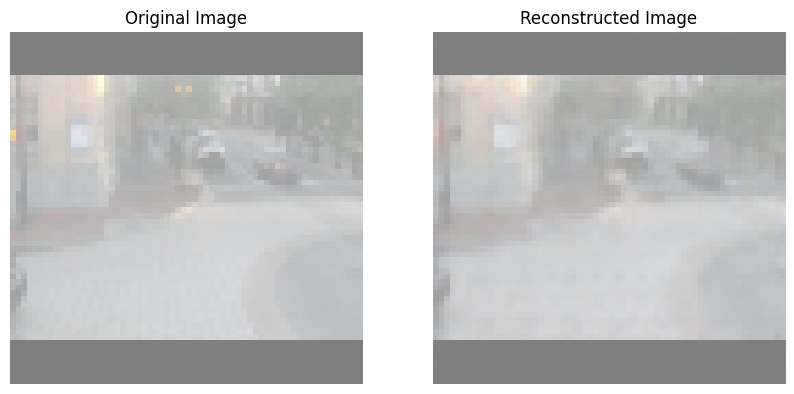

0.0004476538742892444

In [13]:
# normal image
normal_image = "data/SmallerDataset/Test/Normal_Videos_912_x264_340.png"
visualize_reconstruction(model,  normal_image, transform, device=device)

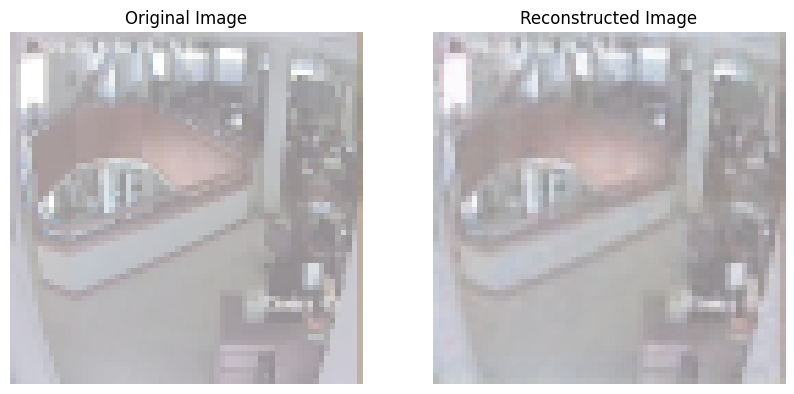

0.0010825665667653084

In [14]:
normal_image_2 = "data/SmallerDataset/Test/Normal_Videos_923_x264_10660.png"
visualize_reconstruction(model,  normal_image_2, transform, device=device)

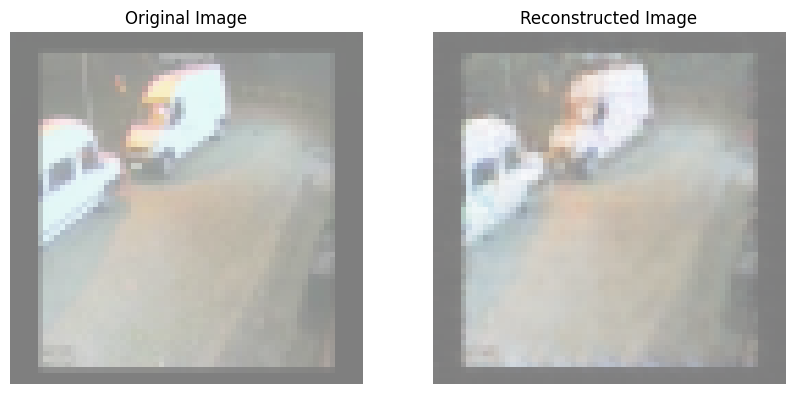

0.0014964294387027621

In [15]:
# anomaly images
anomaly_1 = "data/SmallerDataset/AnomalyImages/Arson010_x264_1460.png"
visualize_reconstruction(model,  anomaly_1, transform, device=device)


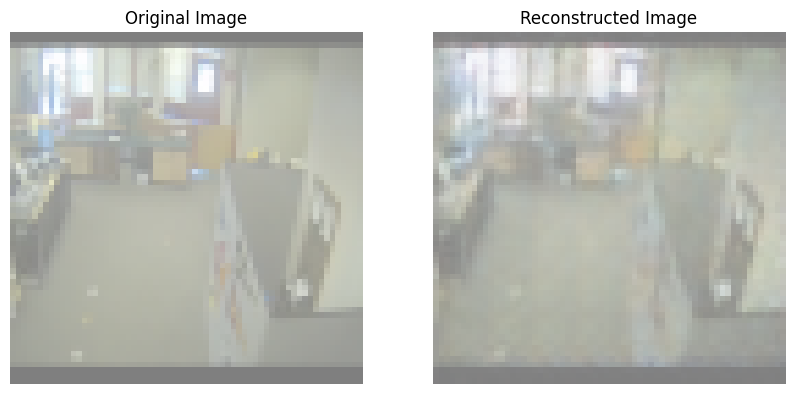

0.0012104952475056052

In [17]:
anomaly_2 = "data/SmallerDataset/AnomalyImages/Arrest001_x264_480.png"
visualize_reconstruction(model,  anomaly_2, transform, device=device)

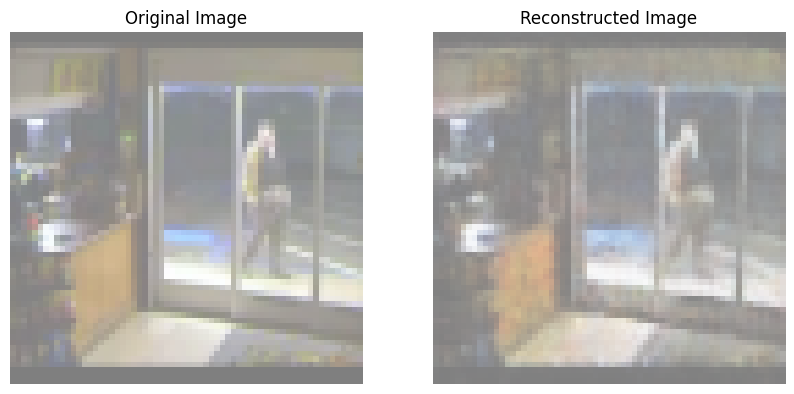

0.0019949853885918856

In [18]:
anomaly_3 = "data/SmallerDataset/AnomalyImages/Vandalism017_x264_540.png"
visualize_reconstruction(model, anomaly_3, transform, device=device)

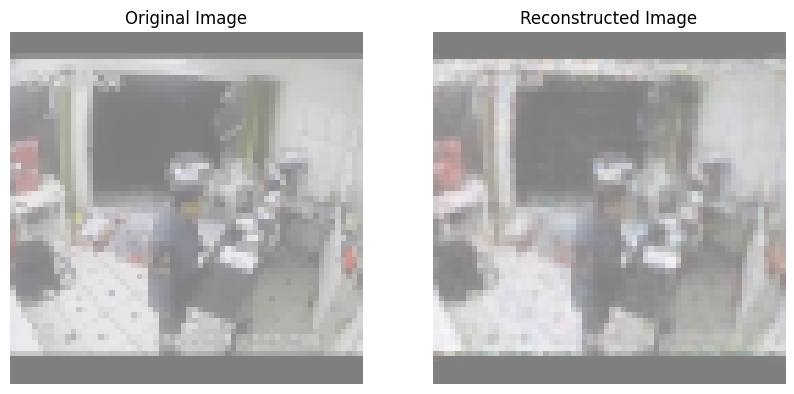

0.0022213347256183624

In [19]:
anomaly_4 = "data/SmallerDataset/AnomalyImages/Shooting011_x264_3980.png"
visualize_reconstruction(model, anomaly_4, transform, device=device)